#<center>Python统计可视化库Seaborn<center>

<center>易红发 yihongfa@yeah.net</center>

　　大家都知道Python中有一个强大的可视化库matplotlib，其中matplotlib.pyplot也是针对统计可视化，可问题在于matplotlib太过繁复，这里推荐另一个统计可视化库Seaborn，只需简单的几行代码，就可以画出相当漂亮的统计图。  
　　另外，如果需要制作交互式图表，Python中我推荐[bokeh库](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/quickstart/quickstart.ipynb)  
　　注：本分享可直接下载，然后用IPython notebook（现在叫jupyter）运行。

#可视化连续数据集

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
np.random.seed(sum(map(ord, "distributions")))

##<ul><li>可视化单变量</ul>

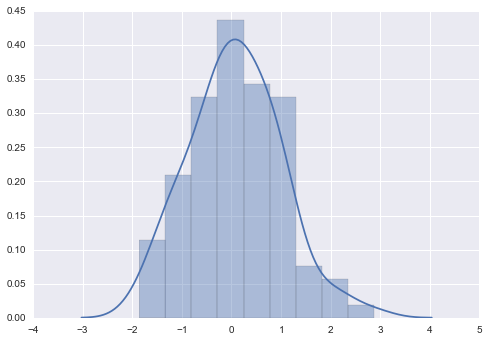

In [8]:
x = np.random.normal(size=100)
sns.distplot(x)#默认增加趋势线

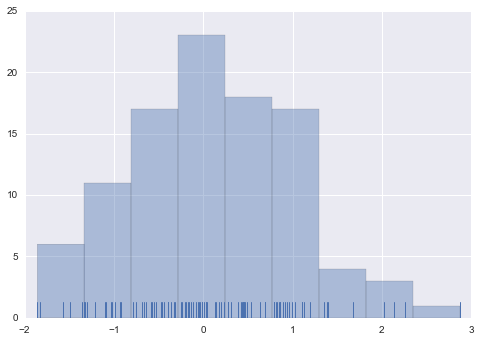

In [9]:
sns.distplot(x, kde=False, rug=True)#删除趋势线，增加地毯图

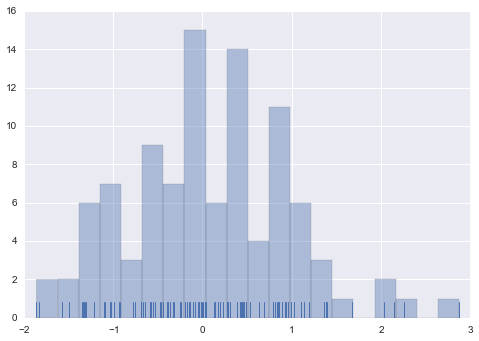

In [10]:
sns.distplot(x, bins=20, kde=False, rug=True)#将箱数设置为20

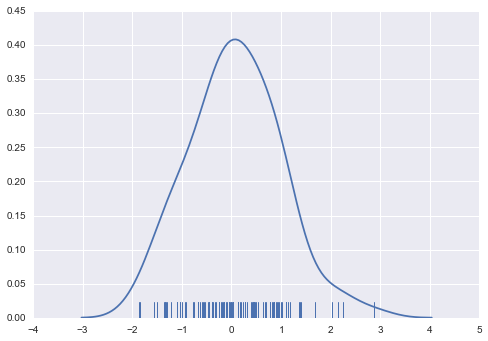

In [11]:
sns.distplot(x, hist=False, rug=True)#要趋势线，不要直方图

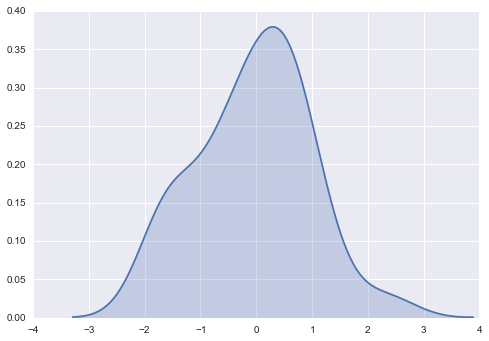

In [13]:
sns.kdeplot(x, shade=True)#也可以直接使用线图

一个新的参数 bw（banwidth）类似于直方图里面的箱数

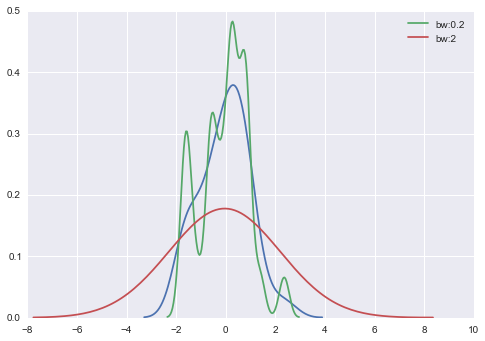

In [15]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw:0.2")
sns.kdeplot(x, bw=2, label="bw:2")
plt.legend()

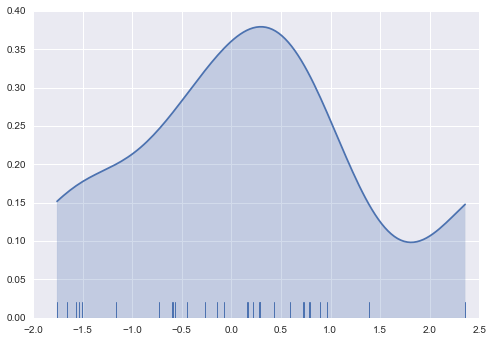

In [20]:
sns.kdeplot(x, shade=True, cut=0)#删除极端值
sns.rugplot(x)

##<ul><li>可视化双变量

In [23]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

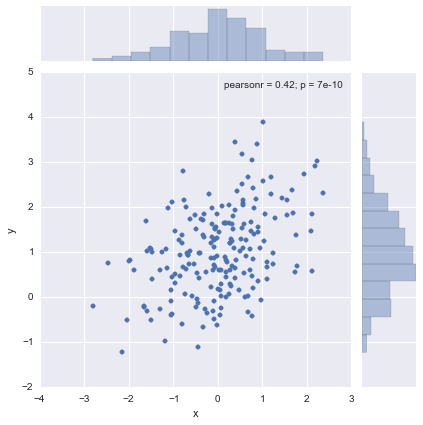

In [25]:
sns.jointplot(x="x", y="y", data=df)#默认散点图

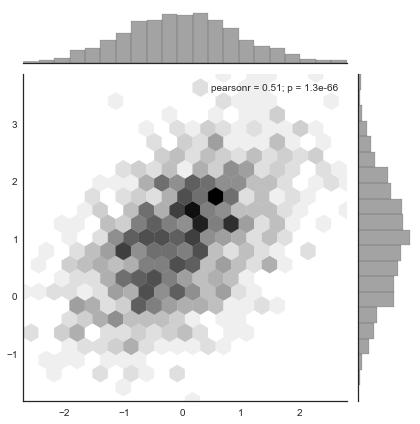

In [26]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")#六边分图

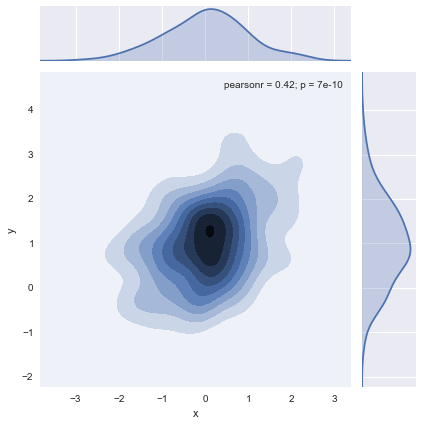

In [27]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

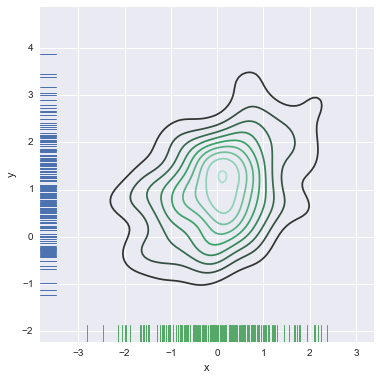

In [28]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)#通过kdeplot画图
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

##<ul><li>可视化多对关系

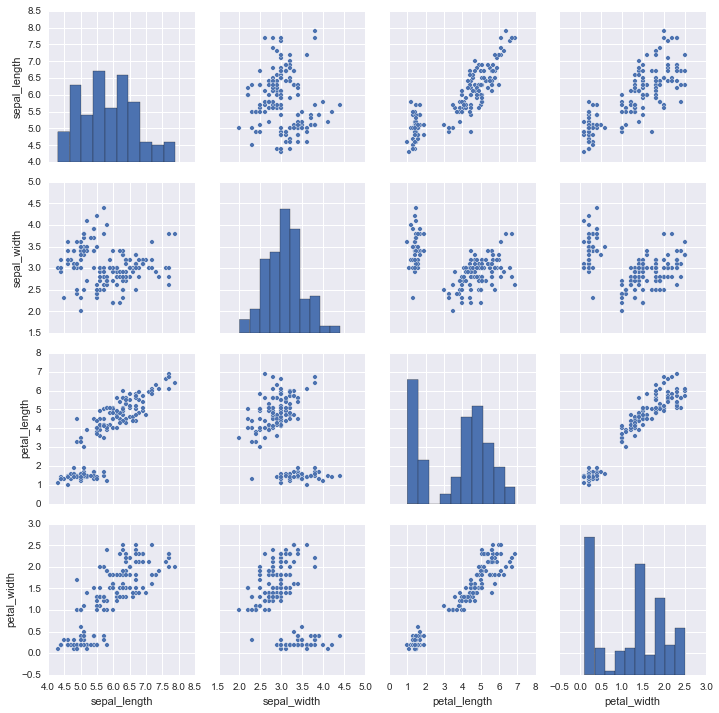

In [6]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

#可视化线性关系

In [7]:
np.random.seed(sum(map(ord, "regression")))

In [8]:
tips = sns.load_dataset('tips')

##<ul><li>绘制函数

regplot()和lmplot()两个函数，前一个接受各种数据输入，后一种更为严格

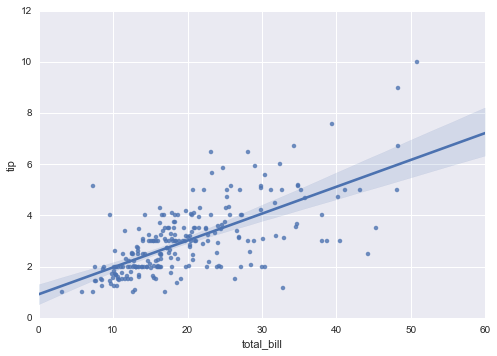

In [10]:
sns.regplot(x="total_bill", y="tip", data=tips)

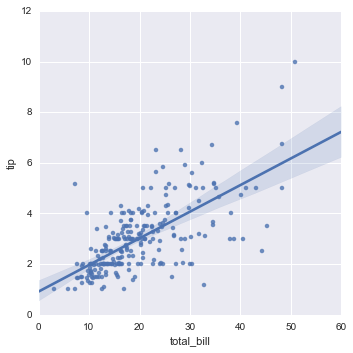

In [14]:
sns.lmplot(x="total_bill", y="tip", data=tips)

有时候数据集所产生的散点图并不是最优的

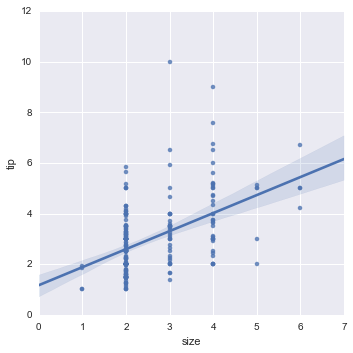

In [15]:
sns.lmplot(x='size', y='tip', data=tips)

改进的方法，一种是增加一些随机噪音('jitter')

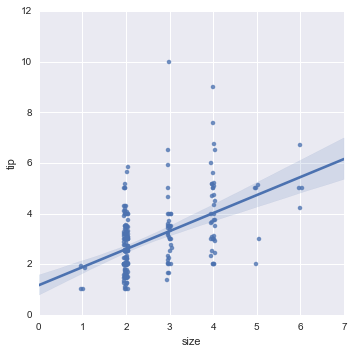

In [16]:
sns.lmplot(x='size', y='tip', data=tips, x_jitter=.05)

另一种方法是根据每个离散值的中心，以绘制趋势

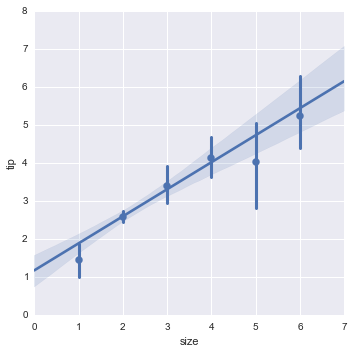

In [17]:
sns.lmplot(x='size', y='tip', data=tips, x_estimator=np.mean)

##<ul><li>适应各种模型

In [18]:
anscombe = sns.load_dataset('anscombe')

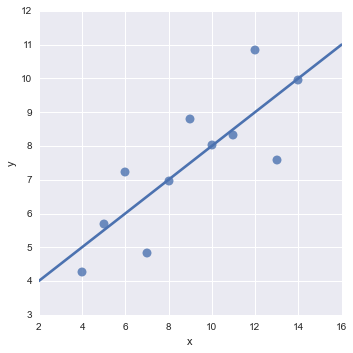

In [21]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})

上图是合适的，然而下图却不是合适模型

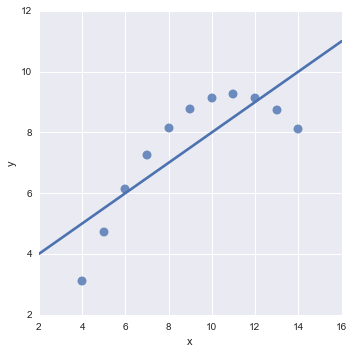

In [22]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

此时，非线性模型更为合适，这里用二次模型

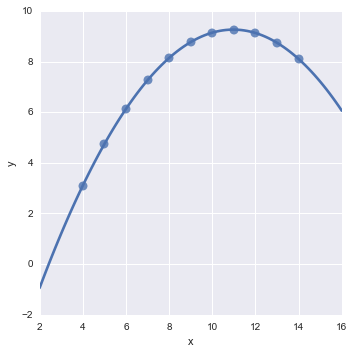

In [23]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})

另外一个问题是离群值的影响

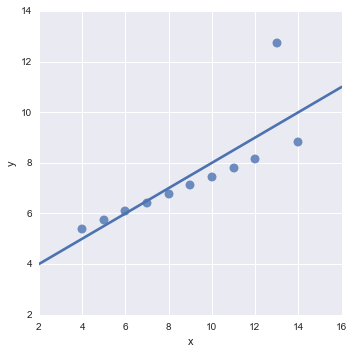

In [24]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80})

为了排除离群值的影响，我们可以拟合一种更为robust的模型

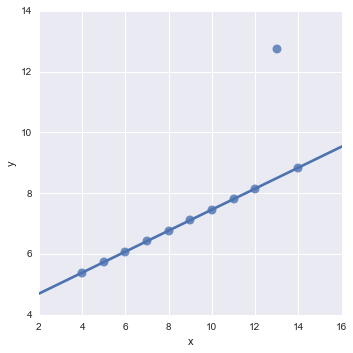

In [25]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

当因变量为0-1变量是，线性回归仍然有效，但有些预测值并不合理

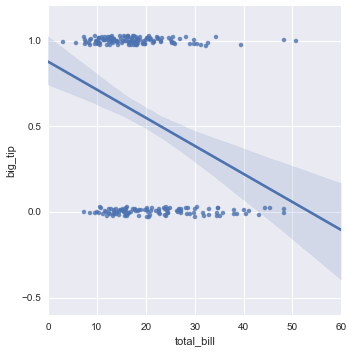

In [26]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03)

此时，最好拟合logistic模型

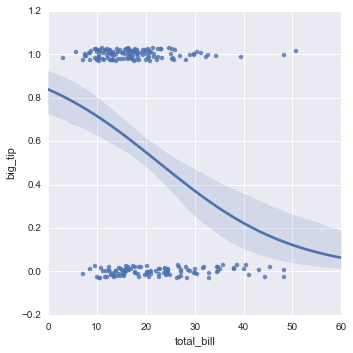

In [27]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)

##<ul><li>在其他变量的条件下

此时，最为简单的方法就是用不同颜色表示

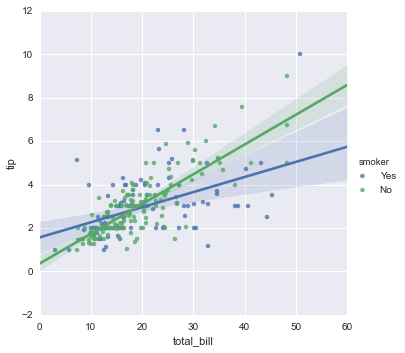

In [28]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

除了改变颜色，还可以改变点的标记

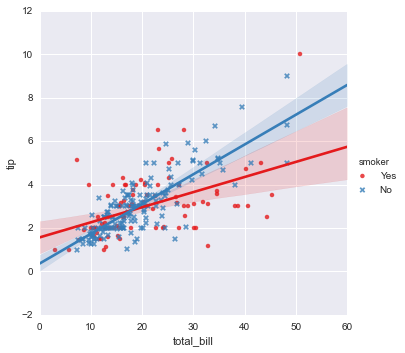

In [31]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

要再增加其他变量，可以画多个图

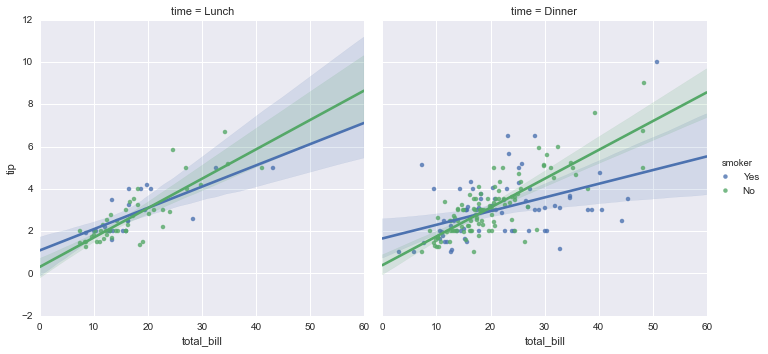

In [32]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

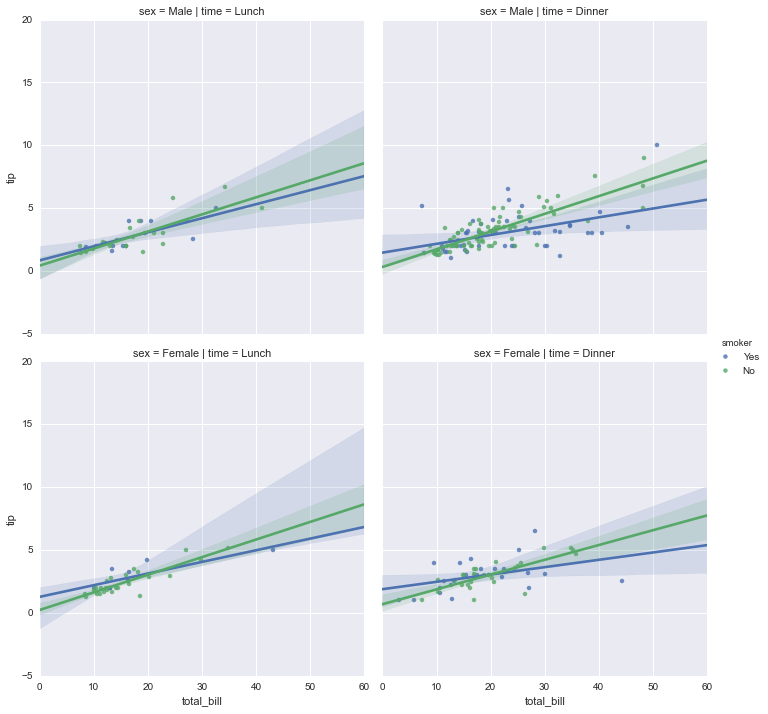

In [33]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips)

##<ul><li>控制图片大小和格式

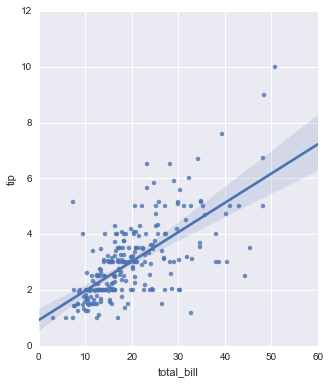

In [37]:
f, ax = plt.subplots(figsize=(5,6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax)

在lmplot()中，用size和aspect控制

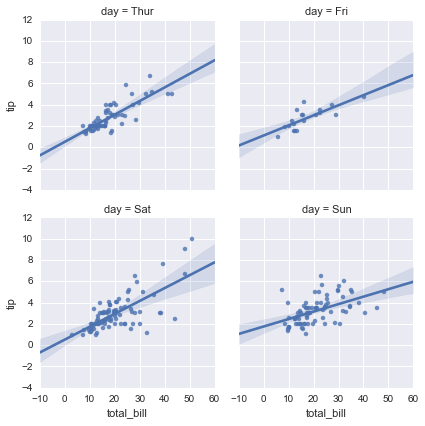

In [38]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3)

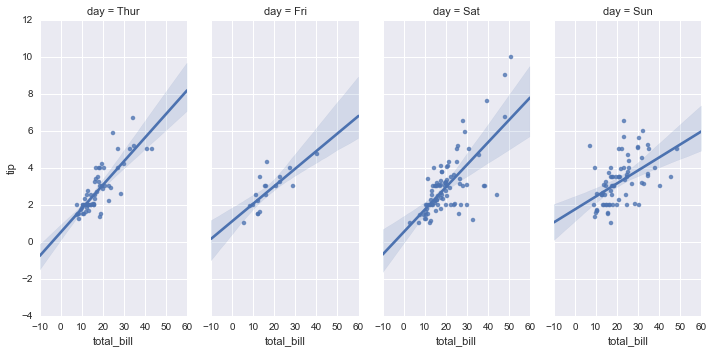

In [47]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=0.5)

##<ul><li>用其他方法绘制回归图

用jointplot()

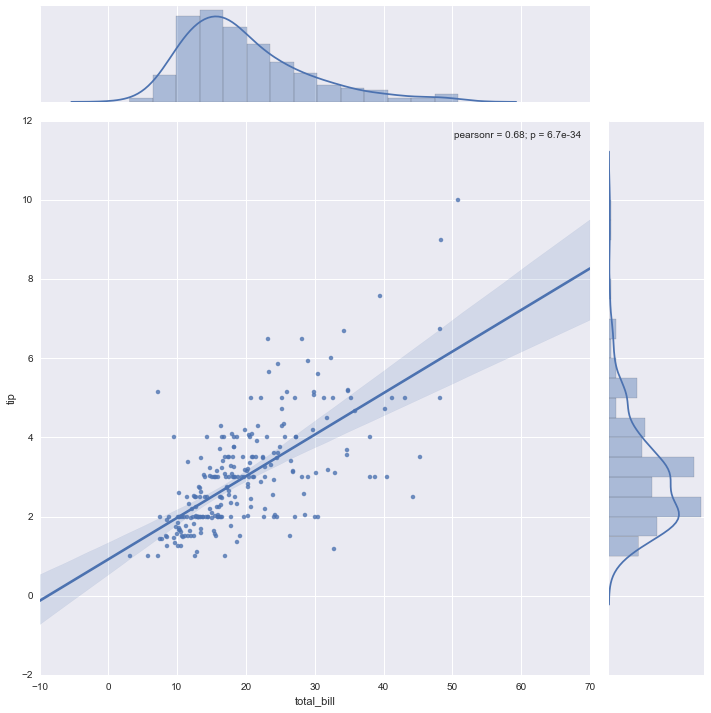

In [49]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg", size=10)

用pairplot()

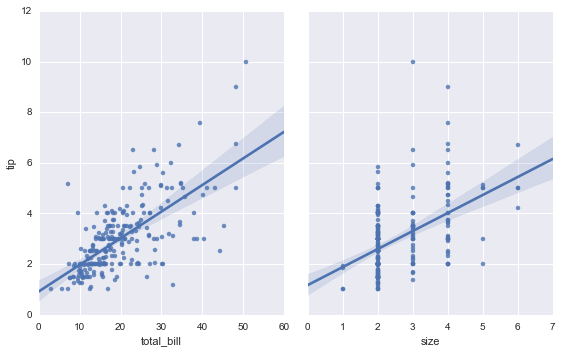

In [50]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg")

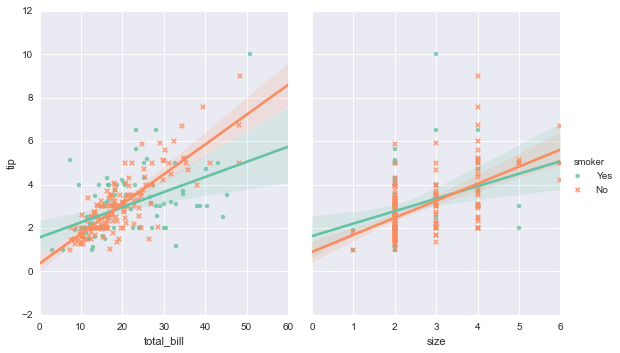

In [56]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker",markers=["o", "x"], palette="Set2",
             size=5, aspect=.8, kind="reg")

#分类数据画图

In [4]:
np.random.seed(sum(map(ord, "categorical")))

In [5]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

In [6]:
titanic = sns.load_dataset("titanic")

##<ul><li>分类变量与连续变量

###<ul><ul><li>stripplot()

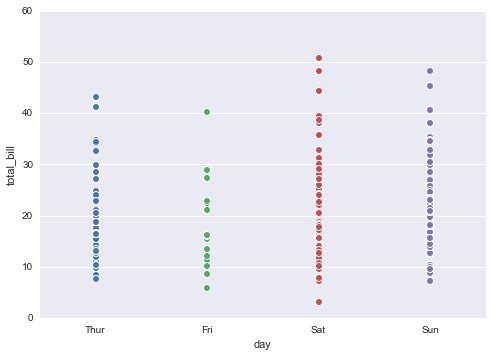

In [63]:
sns.stripplot(x="day", y="total_bill", data=tips)

在其他变量的条件下

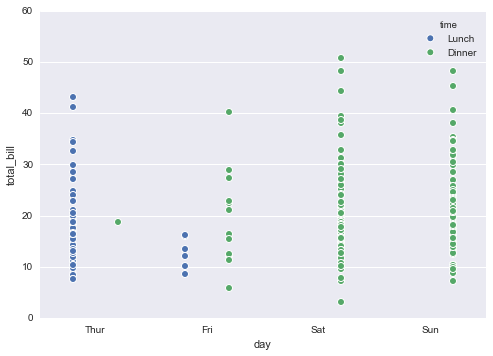

In [64]:
sns.stripplot(x="day", y="total_bill", hue="time", data=tips)

转换坐标轴

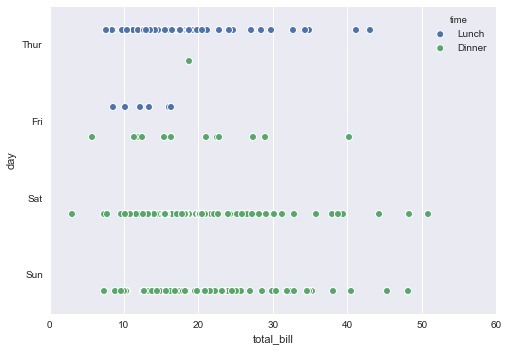

In [65]:
sns.stripplot(x="total_bill", y="day", hue="time", data=tips)

###<ul><ul><li>boxplot()

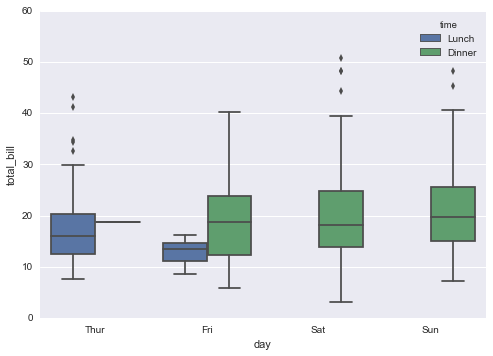

In [66]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

###<ul><ul><li>violinplot()

箱型图+核密度

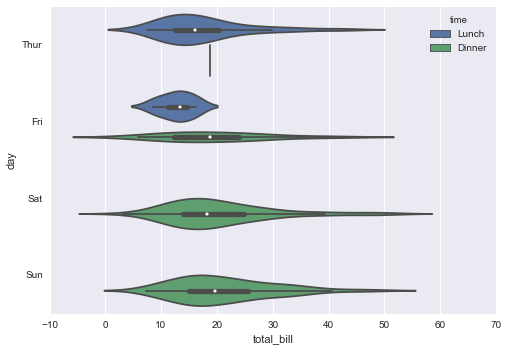

In [67]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)

改变核密度的变化细分，相当于改变箱数

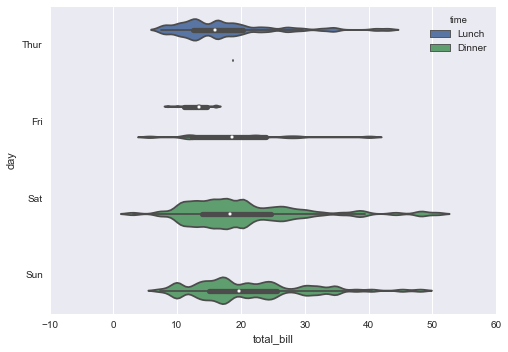

In [77]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False)

当每个箱都有且只有两个水平时，可以使用拆分split

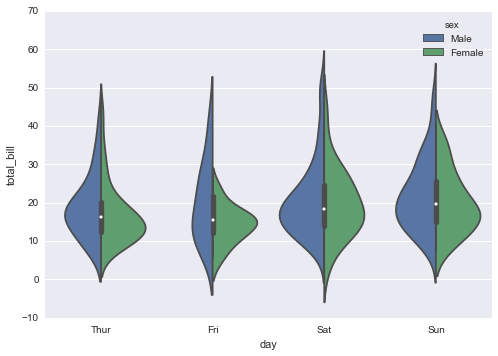

In [78]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)

如果想看细分的数据，可以用inner

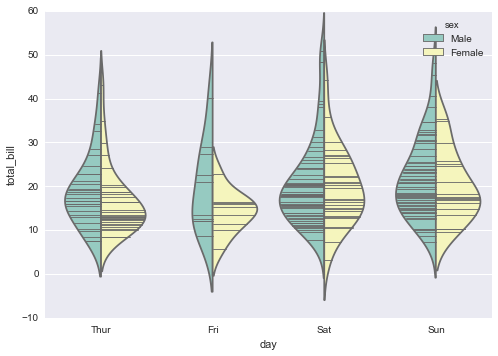

In [82]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3")

综合提琴图和带图

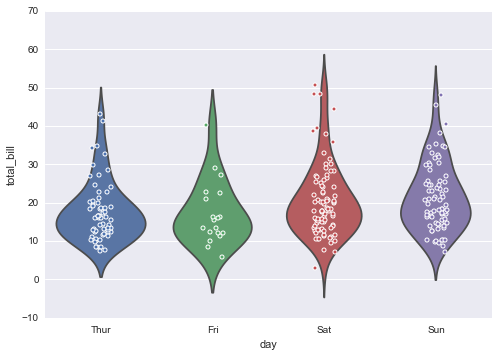

In [85]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, size=4)

##<ul><li>分类变量与分类变量

###<ul><ul><li>barplot()

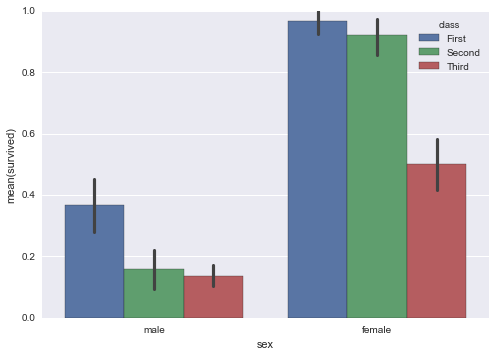

In [9]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

###<ul><ul><li>countplot()

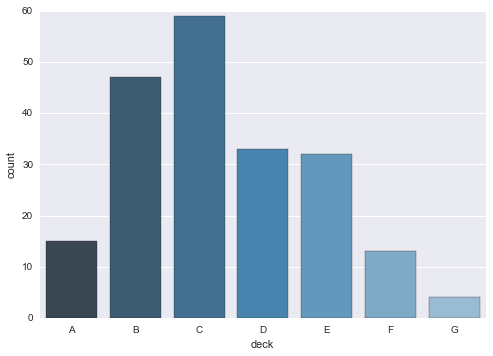

In [16]:
sns.countplot(x="deck", data=titanic, palette="Blues_d")

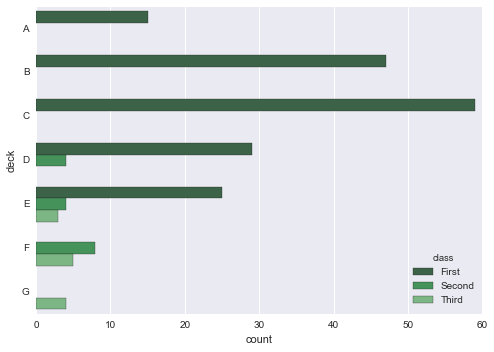

In [17]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d")

###<ul><ul><li>pointplot()

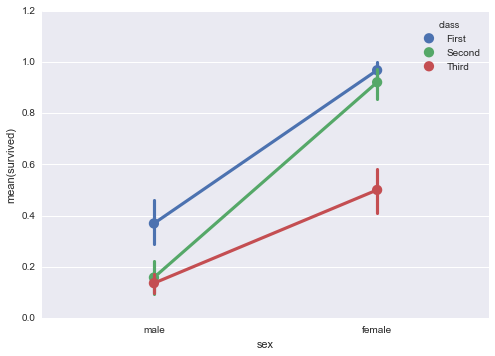

In [18]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic)

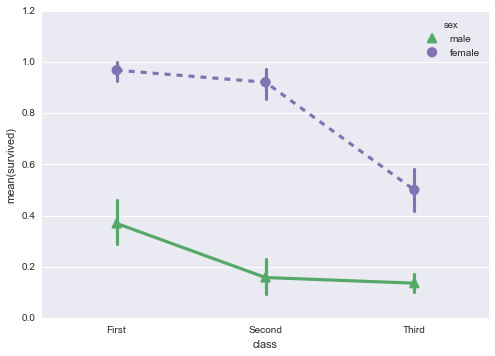

In [19]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])